# Data from other sources - WIP

### Neuromorpho 

Neuromorpho.org is a jsp website.  
Scrape and download using selenium. 

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
!which python

/Users/User1/anaconda/envs/python2/bin/python


In [3]:
import os
os.getcwd()

'/Users/User1/DS/aibs/raw/notes'

In [4]:
import sys
sys.path.append('../..')

In [5]:
from src import *

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from bs4 import BeautifulSoup as BS

In [7]:
import time

In [8]:
from src import neuroncollector

Connected to mongodb://localhost:27017/
use_firefox accessed


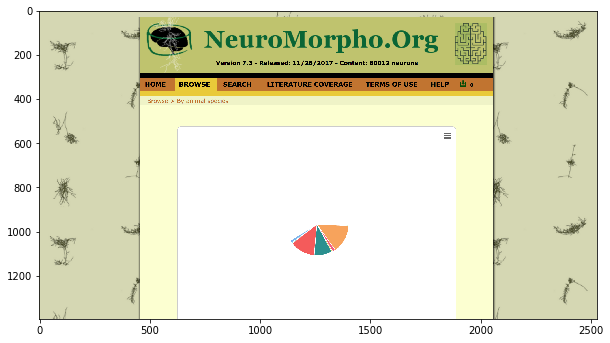

In [9]:
# initialize scraper
scraper = neuroncollector.NeuroScraper(browser="Firefox",machine='mac')
time.sleep(3)
#access website
scraper.driver.get('http://neuromorpho.org/byspecies.jsp')

# get screenshot
scraper.driver.get_screenshot_as_file(filename='sc.png')
plt.figure(figsize=(10,10))
img=mpimg.imread('sc.png')
imgplot = plt.imshow(img)
plt.show()

In [10]:
species = scraper.driver.find_elements_by_class_name('species')

# Total number of species in neuromorpho database:
len(species)

40

In [11]:
scraper.driver.find_element_by_link_text('drosophila melanogaster')

<selenium.webdriver.firefox.webelement.FirefoxWebElement (session="47f4bfe2-9fb8-2346-9b43-148d676531d1", element="7198c858-f0fa-0347-bde0-846923e9d959")>

In [12]:
# click on species:drosophila 
scraper.driver.find_element_by_link_text('drosophila melanogaster').click()

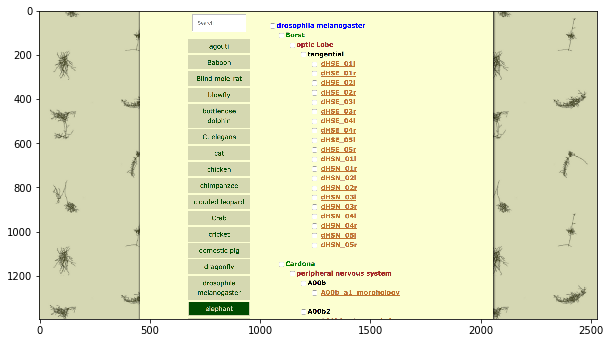

In [13]:
time.sleep(40) #wait for data to load on page

#get screenshot
scraper.driver.get_screenshot_as_file(filename='sc.png')
plt.figure(figsize=(10,10))
img=mpimg.imread('sc.png')
imgplot = plt.imshow(img)
plt.show()

In [14]:
# `lvl2` is class name for data source (i.e. the contributors)
lvl2 = scraper.driver.find_elements_by_class_name('lvl2')

len(lvl2)

18

In [15]:
# optionally get the entire page for parsing and soupify
soup = BS(scraper.driver.page_source, "html.parser")

In [16]:
# get list of data sources
datasources = soup.findAll("font", {"class": "lvl2"})
source_name = [a.text for a in datasources]

In [17]:
# `lvl3` is label for brain regions
brain_region = soup.findAll("font", {"class": "lvl3"})

set([a.text for a in brain_region])

{'Left Mushroom Body',
 'Right Mushroom Body',
 'adult central complex',
 'adult subesophageal zone',
 'antennal lobe',
 'lateral complex',
 'lateral horn',
 'optic Lobe',
 'peripheral nervous system',
 'protocerebrum',
 'subesophageal ganglion',
 'ventrolateral neuropils'}

In [18]:
#Neuron cell types!  
cell_types = soup.findAll("font", {"class": "lvl4"})

set([a.text for a in cell_types])  

{'A00b',
 'A00b2',
 'A00c',
 'A02m/A02n',
 'A02o',
 'A03o',
 'A05e',
 'A05q',
 'A08d',
 'A08m',
 'A08x',
 'A08y',
 'A10a',
 'A10f',
 'A10j',
 'A10l',
 'A12m',
 'A12q',
 'A19c',
 'A23g',
 'A29b',
 'Basin-1',
 'Basin-2',
 'Basin-3',
 'Basin-4',
 'C2',
 'C3',
 'CT1',
 'Dm',
 'Dm-type unknown-1',
 'Dm-type unknown-2',
 'Dm1',
 'Dm1-like',
 'Dm1/6-like',
 'Dm10',
 'Dm2',
 'Dm3',
 'Dm3-like',
 'Dm4',
 'Dm5-like',
 'Dm6',
 'Dm7',
 'Dm7-like',
 'Dm8',
 'Dm9',
 'GABAergic',
 'Goro',
 'Ipsigoro',
 'Ipsiphone',
 'Kenyon cell',
 'L1',
 'L2',
 'L3',
 'L4',
 'L5',
 'LaWF1',
 'Lawf2',
 'Mi',
 'Mi-type unknown-1',
 'Mi1',
 'Mi10',
 'Mi11-like',
 'Mi13',
 'Mi14',
 'Mi15',
 'Mi2',
 'Mi3-like',
 'Mi4',
 'Mi9',
 'Motoneuron',
 'Mt11-like',
 'Mt3-like',
 'Mt4-like',
 'Mt5-like',
 'Multidendritic-dendritic arborization (DA)',
 'Olt-like',
 'Pm',
 'Pm-type unknown-1',
 'Pm-type unknown-2',
 'Pm1',
 'Pm2',
 'Pm2-like',
 'R7',
 'R8',
 'SEZ DN 1',
 'SIFamide',
 'T05t',
 'T08x',
 'T1',
 'T2',
 'T2a',
 'T3',
 'T4

In [19]:
# individual neuron ids
neurons = soup.findAll("a", {"class": "screenshot"})

# Number of neurons
len(neurons)

27246

In [20]:
# Click to get meta data files
# scraper.driver.find_element_by_name('Sig').click()
scraper.driver.find_element_by_name('Aux').click()

In [21]:
chkbox = 'drosophila melanogaster_chkbox'
for idnum in range(len(datasources[10])):
    scraper.driver.switch_to.window(scraper.driver.window_handles[0])
    print("{} - Clicking on {}".format(idnum,datasources[idnum].text))
    if idnum > 0: 
        scraper.driver.find_elements_by_id(chkbox)[idnum-1].click()
    scraper.driver.find_elements_by_id(chkbox)[idnum].click()
    # Get selected files 
    scraper.driver.find_element_by_xpath("//input[@value='Get SWC files of selected neurons']").click()
    time.sleep(5)
    scraper.driver.switch_to.window(scraper.driver.window_handles[1])
    time.sleep(20)
    scraper.driver.find_element_by_name('yes').click()
    time.sleep(20)
    scraper.driver.close()

0 - Clicking on Borst
1 - Clicking on Cardona
2 - Clicking on Chiang


NoSuchElementException: Message: Unable to locate element: [name="yes"]


In [ ]:
[(i, a.text) for i, a in enumerate(datasources) if a.text== u'Nusser']

In [ ]:
scraper.driver.window_handles

In [ ]:
# Todo: tidy up and create functions using notebook 

In [ ]:
scraper.driver.quit()